In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

submissions = {'IDS': [29956349, 30426856, 30276814, 30270275, 30428273, 30428350, 30428424, 30428793, 30715966, 30715275], 
               'LB Scores': [66.24, 82.87, 82.86, 79.38, 82.5, 78.91, 82.75, 81.75, 82.66, 83.02], 
               'Validation Scores': [76.36, 90.43, 90.49, 88.49, 90.24, 88.81, 88.9, 89.65, 88.65, 91.19]}
scores = pd.DataFrame(submissions)
scores.loc[:, 'delta'] = scores['Validation Scores'] - scores['LB Scores']
scores.loc[:, 'Predicted LB'] = scores['Validation Scores'] - np.mean(scores['delta'])
scores.loc[:, 'Predicted LB lower bound'] = scores['Validation Scores'] - np.mean(scores['delta']) - np.std(scores['delta']) 
scores.loc[:, 'Predicted LB upper bound'] = scores['Validation Scores'] - np.mean(scores['delta']) + np.std(scores['delta']) 

In [7]:
scores

,IDS,LB Scores,Validation Scores,delta,Predicted LB,Predicted LB lower bound,Predicted LB upper bound
0,29956349,66.24,76.36,10.12,68.333,67.020414,69.645586
1,30426856,82.87,90.43,7.56,82.403,81.090414,83.715586
2,30276814,82.86,90.49,7.63,82.463,81.150414,83.775586
3,30270275,79.38,88.49,9.11,80.463,79.150414,81.775586
4,30428273,82.50,90.24,7.74,82.213,80.900414,83.525586
5,30428350,78.91,88.81,9.90,80.783,79.470414,82.095586
6,30428424,82.75,88.90,6.15,80.873,79.560414,82.185586
7,30428793,81.75,89.65,7.90,81.623,80.310414,82.935586
8,30715966,82.66,88.65,5.99,80.623,79.310414,81.935586
9,30715275,83.02,91.19,8.17,83.163,81.850414,84.475586


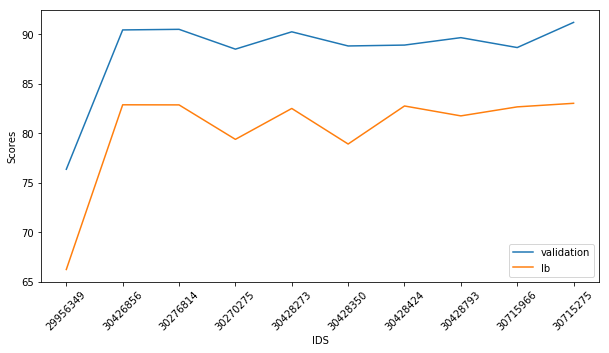

In [8]:
plt.figure(figsize = (10,5))
plt.xticks(np.arange(len(scores)), scores['IDS'].values, rotation = '45')
plt.xlabel('IDS')
plt.ylabel('Scores')
plt.plot(scores['Validation Scores'].values)
plt.plot(scores['LB Scores'].values)
plt.legend(['validation', 'lb'])
plt.show()